In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [2]:
import zipfile
import os
import pandas as pd
from wordcloud import WordCloud


In [3]:
# Path to the uploaded zip file
zip_path = '/content/Fake_News_Detection_With_Explainable_AI_Using_Lime-main.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/fake_news_detection')

# Verify extraction
os.listdir('/content/fake_news_detection')

['Fake.csv',
 'Fake_News_Detection_With_Explainable_AI_Using_Lime-main',
 'True.csv']

In [4]:
# Load the datasets
true_path = '/content/fake_news_detection/True.csv'
fake_path = '/content/fake_news_detection/Fake.csv'

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

# Display the first few rows of each dataset
print("True News Dataset:")
print(df_true.head())

print("\nFake News Dataset:")
print(df_fake.head())


True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News Dataset:
                                               title  \
0  

In [5]:
# Add labels to the datasets
df_true['label'] = 1  # True news
df_fake['label'] = 0  # Fake news

# Combine the datasets
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

# Display the combined dataset
print("Combined Dataset:")
print(df.head())

Combined Dataset:
                                               title  \
0  Clinton Foundation to bar foreign, corporate f...   
1  WHY IS OBAMA DISARMING COPS IN AMERICA At Same...   
2  Gun control groups spend millions on state bal...   
3  UK to remain in sync after Brexit with EU rule...   
4  China's Xi discusses Rohingya crisis with Myan...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The Clinton Foundation ...  politicsNews   
1  In the face of mounting threats of terrorism a...      politics   
2  NEW YORK (Reuters) - Gun safety advocates are ...  politicsNews   
3  BRUSSELS (Reuters) - Britain will  maintain fu...     worldnews   
4  YANGON (Reuters) - Chinese President Xi Jinpin...     worldnews   

                 date  label  
0    August 18, 2016       1  
1        May 20, 2015      0  
2   November 2, 2016       1  
3   December 8, 2017       1  
4  November 24, 2017       1  


In [6]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

Dataset shape: (44898, 5)
Columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [7]:
print(df.describe())

              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [8]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


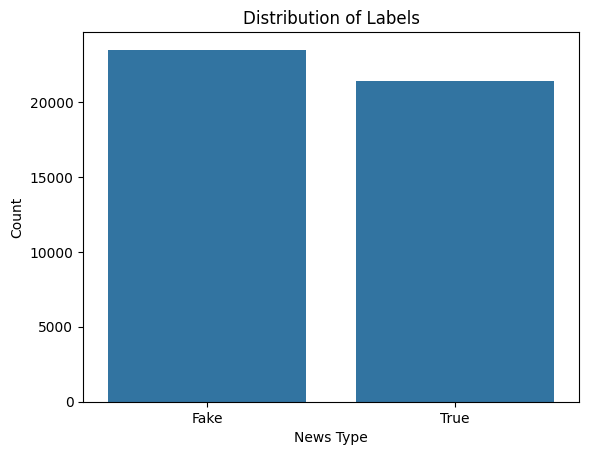

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

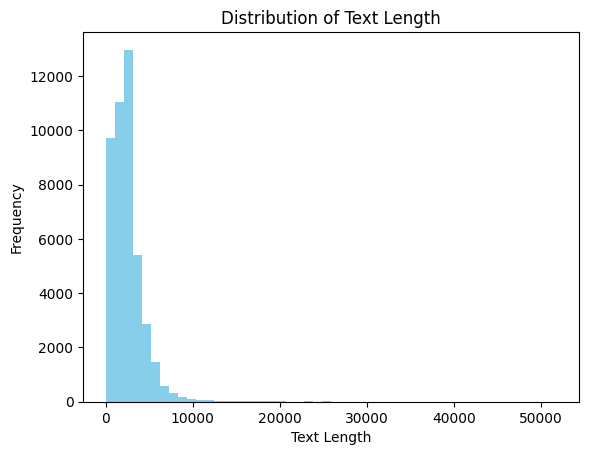

In [10]:
df['text_length'] = df['text'].apply(len)

plt.hist(df['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Shortest article:")
print(df.loc[df['text_length'].idxmin(), 'text'])

print("\nLongest article:")
print(df.loc[df['text_length'].idxmax(), 'text'])

Shortest article:
 

Longest article:
 Funny how secrets travel. I d start to believe, if I were to bleed.    Lyrics written by David Bowie from the album OutsideShawn Helton 21st Century Wire In the days before the US presidential election in November 2016, Wikileaks revealed a new string of emails connected to Hillary Clinton s 2016 campaign chairman, John Podesta. Online interpretations of the leaked Podesta email exchanges subsequently led to a digital firestorm on social media, producing an intense conspiratorial  open source investigation  still in search of its smoking gun. However, the phenomenon now known by its hashtag #Pizzagate has since set a number of tertiary events into motion. Is there a real story hidden amongst the debris of this online explosion?Is it possible that  open source investigators  were being led into a virtual cul-de-sac and thus missing the real story?More importantly, could people be playing into the hands of the very establishment they seek to depose?

Unique subjects: 8
Subjects distribution:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


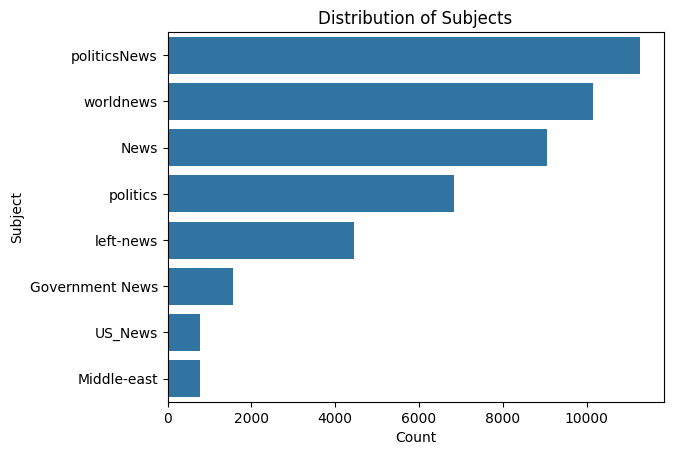

In [12]:
print("Unique subjects:", df['subject'].nunique())
print("Subjects distribution:")
print(df['subject'].value_counts())

# Visualize subject distribution
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index)
plt.title('Distribution of Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

Date range: 2016-01-13 00:00:00 to 2017-12-31 00:00:00


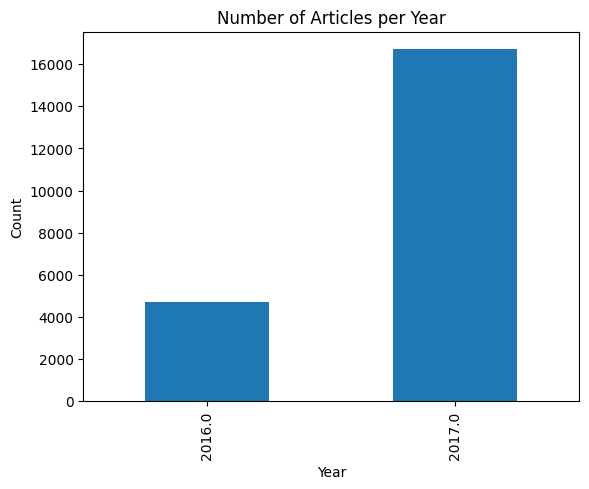

In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
print("Date range:", df['date'].min(), "to", df['date'].max())

# Plot articles over time
df['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

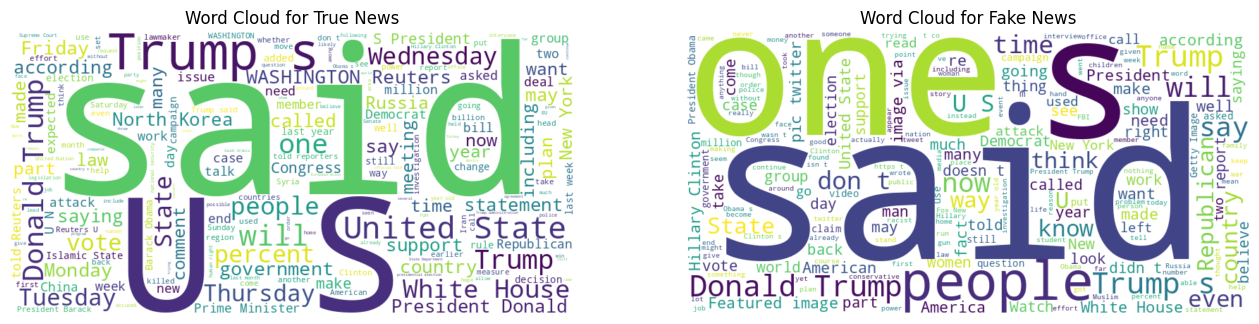

In [14]:
# Word cloud for true news
true_text = ' '.join(df[df['label'] == 1]['text'])
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Word cloud for fake news
fake_text = ' '.join(df[df['label'] == 0]['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.show()

In [15]:
# Previous operations that might have set df to None
# Ensure that df is correctly assigned to a pandas DataFrame
# by reloading or re-executing the DataFrame creation steps.
import pandas as pd

# Reload the datasets
true_path = '/content/fake_news_detection/True.csv'
fake_path = '/content/fake_news_detection/Fake.csv'

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

# Add labels to the datasets
df_true['label'] = 1  # True news
df_fake['label'] = 0  # Fake news

# Combine the datasets
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

# Now you can drop duplicates
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

# Check the shape of the dataset after dropping duplicates
print("Shape after dropping duplicates based on 'text':", df.shape)


Shape after dropping duplicates based on 'text': (38646, 5)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38646 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38646 non-null  object
 1   text     38646 non-null  object
 2   subject  38646 non-null  object
 3   date     38646 non-null  object
 4   label    38646 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


# **BERT MODEL**

In [17]:
# Function to clean text

import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(df[['cleaned_text', 'label']].head())

Cleaned Dataset:
                                        cleaned_text  label
0  sydney reuters australian prime minister malco...      1
1  donald trump said after his official meeting w...      0
2  hong kong reuters a british activist critical ...      1
3  lt col tony shaffer opened a can of worms toni...      0
4  pristina reuters two kosovo men pleaded guilty...      1


In [18]:
!pip install tensorflow transformers lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=429b15ce8c38d728a647e0ce306c6d2a4a3b0c912d36e223341fc719a93e26e2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [22]:
import pandas as pd
import tensorflow as tf
# from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from lime.lime_text import LimeTextExplainer

In [23]:
# Split the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

In [51]:
train_labels[0:10]

[1, 1, 1, 0, 1, 1, 0, 1, 1, 1]

In [24]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used by TensorFlow!")
else:
    print("No GPU found. Please check your runtime settings.")

GPU is available and being used by TensorFlow!


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [27]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 820.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=2, from_pt=False
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [30]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256, return_tensors="tf")
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256, return_tensors="tf")

In [43]:
batch_size = 16  # Increase from 8 to 16
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), tf.convert_to_tensor(train_labels))).shuffle(100).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), tf.convert_to_tensor(test_labels))).batch(batch_size)

In [32]:
import tensorflow as tf
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [33]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_lr = 2e-5
lr_schedule = ExponentialDecay(initial_lr, decay_steps=1000, decay_rate=0.9, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [34]:
tf.config.optimizer.set_jit(True)

In [35]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=5e-5)

In [38]:
from transformers.optimization_tf import AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=5e-5, weight_decay_rate=0.01)

In [39]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [41]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=1,
    restore_best_weights=True
)

In [55]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3,  # Adjust based on performance
    callbacks=[early_stopping]  # Stops early if overfitting
)

Epoch 1/3
1933/1933 [==============================] - 821s 425ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 9.5325e-04 - val_accuracy: 0.9999
Epoch 2/3
1933/1933 [==============================] - 815s 422ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0047 - val_accuracy: 0.9991


In [56]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy}")

484/484 [==============================] - 54s 111ms/step - loss: 9.5325e-04 - accuracy: 0.9999
Test Accuracy: 0.9998706579208374


In [2]:
# explainer = LimeTextExplainer(class_names=['Fake', 'True'])

# def predict_proba(texts):
#     encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="tf")
#     predictions = model(encodings).logits
#     probs = tf.nn.softmax(predictions, axis=-1).numpy()
#     return probs

# # Select a random sample from the test set
# sample_text = test_texts[0]
# exp = explainer.explain_instance(sample_text, predict_proba, num_features=10)
# exp.show_in_notebook()

In [ ]:
!pip install -U "tensorflow<2.16" "keras<3" --quiet

In [ ]:
!pip install -U "keras<3" --quiet

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

TensorFlow Version: 2.18.0
Keras Version: 3.8.0


In [ ]:
!pip install --upgrade tensorflow[and-cuda] --quiet

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [3]:
import tensorflow as tf
import keras
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

# Check if GPU is available
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version: 2.18.0
Keras Version: 3.8.0
Num GPUs Available: 1


In [4]:
!pip install -U tensorflow==2.15.1 keras==2.15.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.1 which is incompatible.


In [5]:
!pip uninstall -y tensorflow-text tf-keras keras tensorflow

Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tensorflow 2.15.1
Uninstalling tensorflow-2.15.1:
  Successfully uninstalled tensorflow-2.15.1


In [6]:
!pip install tensorflow[and-cuda]==2.15.1 keras==2.15.0 tensorflow-text==2.15.1 --quiet

ERROR: Could not find a version that satisfies the requirement tensorflow-text==2.15.1 (from versions: 2.12.0rc0, 2.12.0, 2.12.1, 2.13.0rc0, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0, 2.16.0rc0, 2.16.1, 2.17.0rc0, 2.17.0, 2.18.0rc0, 2.18.0, 2.18.1)
ERROR: No matching distribution found for tensorflow-text==2.15.1


In [7]:
!pip uninstall -y tensorflow keras tensorflow-text tf-keras
!pip install tensorflow[and-cuda]==2.15.1 keras==2.15.0 tensorflow-text==2.15.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2

In [8]:
!pip uninstall -y tensorflow tensorflow-text tf-keras keras

Found existing installation: tensorflow 2.15.1
Uninstalling tensorflow-2.15.1:
  Successfully uninstalled tensorflow-2.15.1
Found existing installation: tensorflow-text 2.15.0
Uninstalling tensorflow-text-2.15.0:
  Successfully uninstalled tensorflow-text-2.15.0
Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Successfully uninstalled tf_keras-2.15.1
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0


In [9]:
!pip install tensorflow==2.15.1 keras==2.15.0 tensorflow-text==2.15.0 tf-keras==2.15.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.0 which is incompatible.


In [10]:
!pip uninstall -y tf-keras dopamine-rl

Found existing installation: tf-keras 2.15.0
Uninstalling tf-keras-2.15.0:
  Successfully uninstalled tf-keras-2.15.0
Found existing installation: dopamine_rl 4.1.2
Uninstalling dopamine_rl-4.1.2:
  Successfully uninstalled dopamine_rl-4.1.2


In [11]:
!pip install dopamine-rl==4.0.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.9 MB/s eta 0:00:00


In [12]:
!pip install tensorflow==2.15.1 keras==2.15.0 tf-keras==2.15.0 tensorflow-text==2.15.0 --quiet

In [13]:
import tensorflow as tf
import keras
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version: 2.18.0
Keras Version: 3.8.0
Num GPUs Available: 1


In [14]:
!pip uninstall -y tensorflow keras tf-keras dopamine-rl

Found existing installation: tensorflow 2.15.1
Uninstalling tensorflow-2.15.1:
  Successfully uninstalled tensorflow-2.15.1
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tf-keras 2.15.0
Uninstalling tf-keras-2.15.0:
  Successfully uninstalled tf-keras-2.15.0
Found existing installation: dopamine-rl 4.0.0
Uninstalling dopamine-rl-4.0.0:
  Successfully uninstalled dopamine-rl-4.0.0


In [15]:
!pip install tensorflow==2.15.1 keras==2.15.0 tf-keras==2.15.0 --quiet

In [16]:
!pip install dopamine-rl==4.0.0 --quiet

In [17]:
!pip install tensorflow-text==2.15.0 --quiet

In [18]:
import tensorflow as tf
import keras
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version: 2.18.0
Keras Version: 3.8.0
Num GPUs Available: 1


In [19]:
!pip uninstall -y tensorflow keras tf-keras dopamine-rl tensorflow-text

Found existing installation: tensorflow 2.15.1
Uninstalling tensorflow-2.15.1:
  Successfully uninstalled tensorflow-2.15.1
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tf-keras 2.15.0
Uninstalling tf-keras-2.15.0:
  Successfully uninstalled tf-keras-2.15.0
Found existing installation: dopamine-rl 4.0.0
Uninstalling dopamine-rl-4.0.0:
  Successfully uninstalled dopamine-rl-4.0.0
Found existing installation: tensorflow-text 2.15.0
Uninstalling tensorflow-text-2.15.0:
  Successfully uninstalled tensorflow-text-2.15.0


In [20]:
!pip cache purge

Files removed: 153


In [21]:
!pip install tensorflow==2.15.1 keras==2.15.0 tf-keras==2.15.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.9 MB/s eta 0:00:00


In [22]:
!pip install dopamine-rl==4.0.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 1.3 MB/s eta 0:00:00


In [23]:
!pip install tensorflow-text==2.15.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 86.5 MB/s eta 0:00:00


In [29]:
import tensorflow as tf
import keras
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version: 2.15.1
Keras Version: 2.15.0
Num GPUs Available: 1
